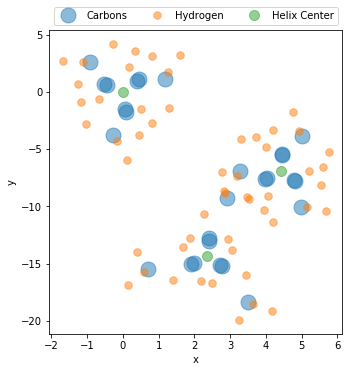

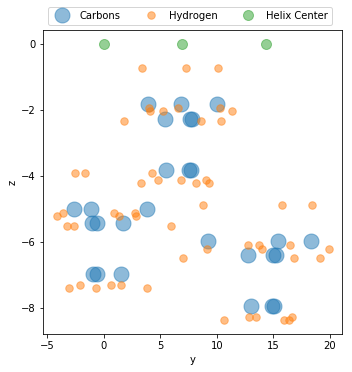

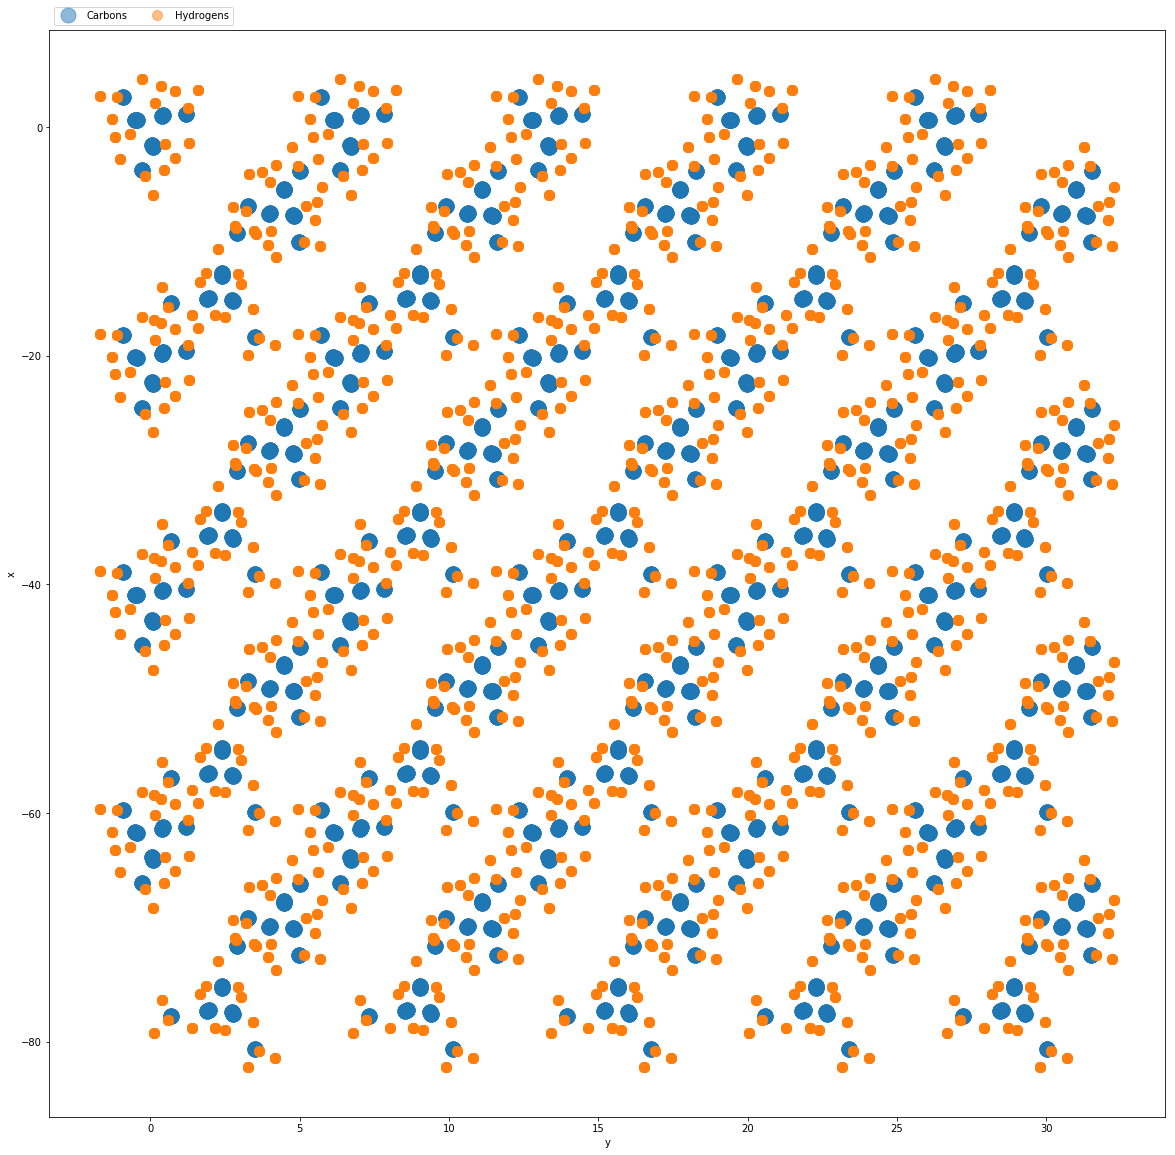

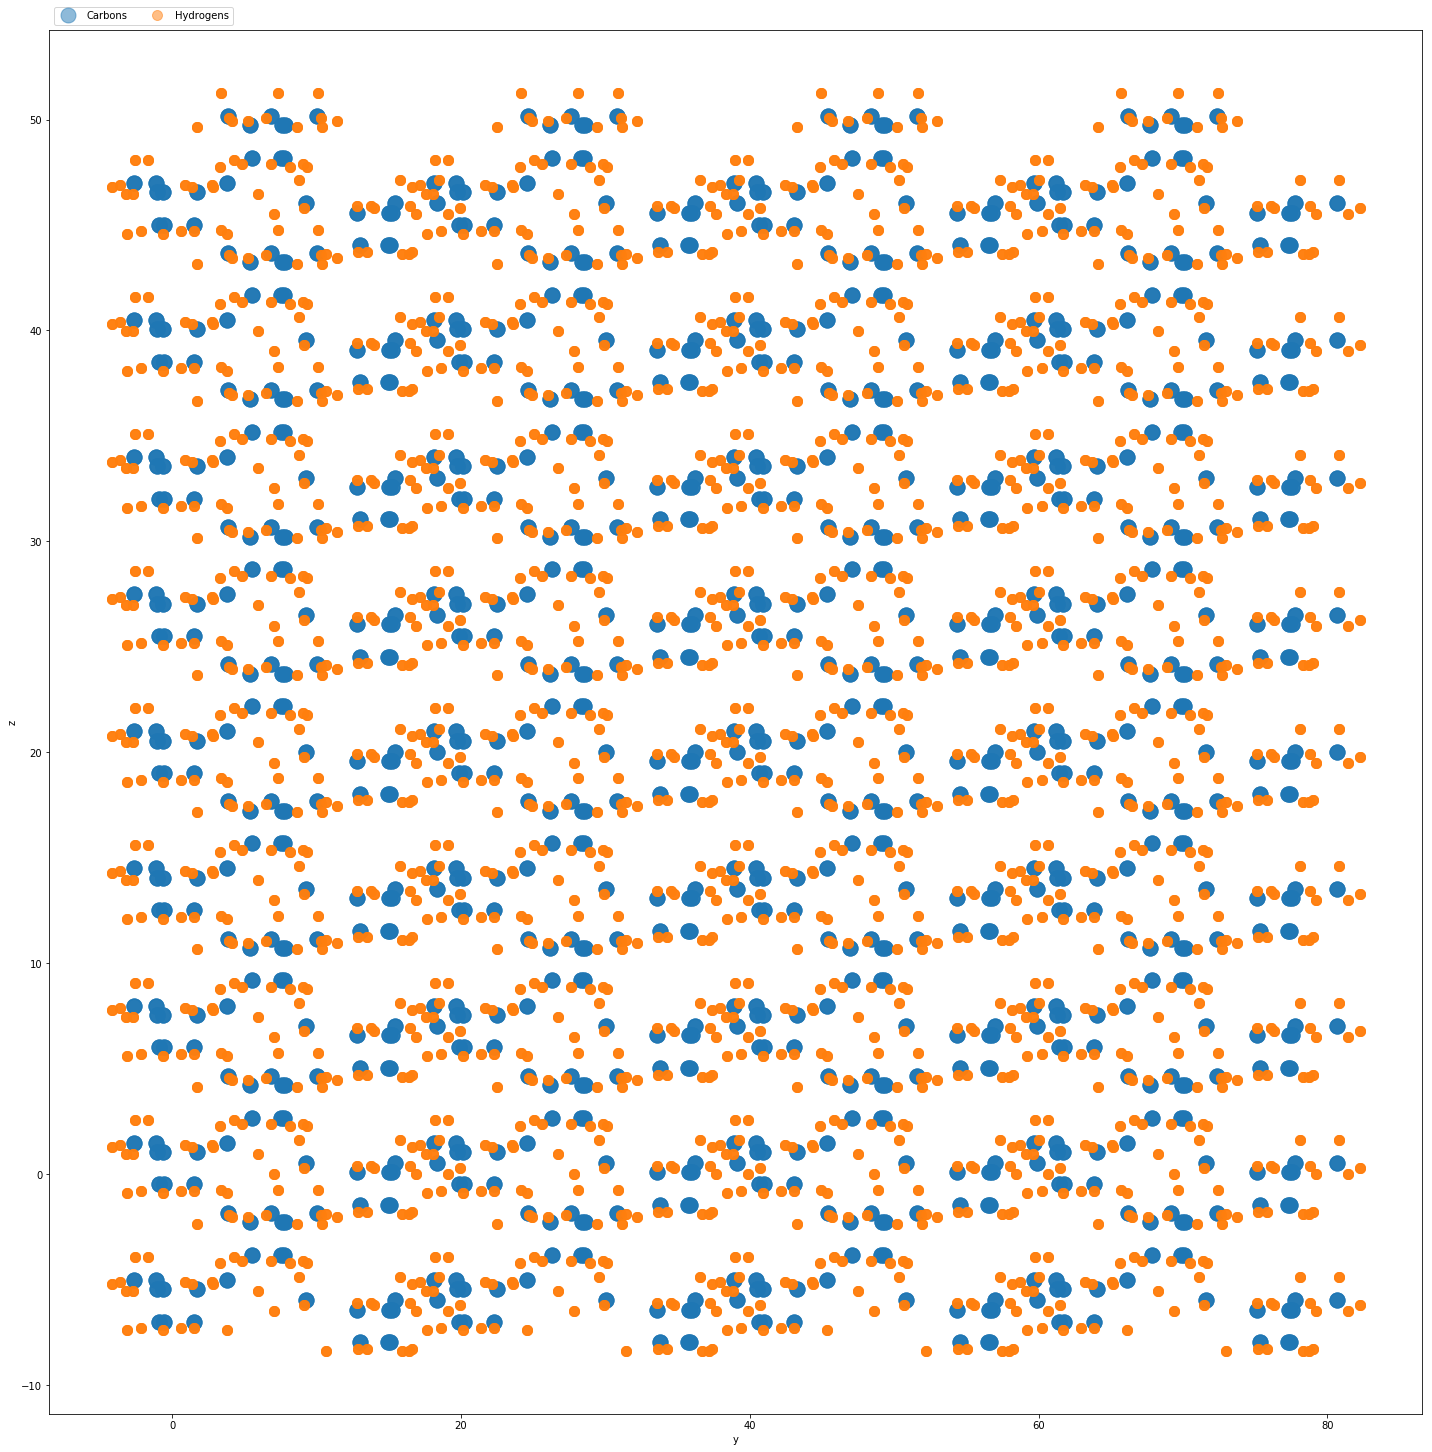

In [39]:
import numpy
import math
from matplotlib import pyplot

''' Energy calculation for iPP: A contribution to clarify the beta crystalline structure
Atomistic fractional coordinates for the P31_21 Model (from D.R Ferro et. al. 1998)'''


''' 
Chain_A = numpy.array([[0.0096, 0.0737, -1.0744],
                       [0.0679, 0.1819, -1.1389],
                       [-0.1017, 0.0291, -1.1226],
                       [0.0122, 0.0831, -0.8373],
                       [0.1238, 0.1323, -0.7878],
                       [-0.0411, 0.1822, -0.7694],
                       [-0.1550, 0.1355, -0.8021],
                       [-0.0246, 0.2065, -0.6019]])

Chain_B = numpy.array([[0.4101, 0.7264, -1.2238],
                       [0.5174, 0.7673, -1.2880],
                       [0.3747, 0.8007, -1.2723],
                       [0.4190, 0.7327, -0.9865],
                       [0.4595, 0.6628, -0.9362],
                       [0.5276, 0.8825, -0.9189],
                       [0.6300, 0.9196, -0.9979],
                       [0.4910, 0.9579, -0.9548],
                       [0.5499, 0.8887, -0.7509]])


Chain_C = numpy.array([[0.6731, 0.2668, -0.5865],               
                       [0.6334, 0.1595, -0.6505],
                       [0.7846, 0.3306, -0.6351],
                       [0.6727, 0.2591, -0.3492],
                       [0.5621, 0.1906, -0.2989],
                       [0.7548, 0.1866, -0.2807],
                       [0.7158, 0.0841, -0.3600],
                       [0.8685, 0.2531, -0.3151],
                       [0.7435, 0.1635, -0.1127]])
                               

def plot_unit_cell1(Chain_A, Chain_B, Chain_C):
    CC = numpy.vstack([numpy.dot(Chain_A, unit_cell), numpy.dot(Chain_B, unit_cell), numpy.dot(Chain_B, unit_cell)])    
    fig1 = pyplot.figure(figsize = (10,5))      
    aC1 = pyplot.plot(CC[:,0], CC[:,1],'.', ms=30, alpha=0.5, label='Carbons')
    pyplot.legend(ncol=4, bbox_to_anchor=(0,1), loc='lower left')
    pyplot.tight_layout()

plot_unit_cell1(Chain_A, Chain_B, Chain_C)
'''

Carbon_chain_A = numpy.array([[0.0096, 0.0737, -1.0744],
                              [0.0122, 0.0831, -0.8373],
                              [-0.0411, 0.1822, -0.7694]])
Hydrogen_chain_A = numpy.array([[0.0679, 0.1819, -1.1389],
                                [-0.1017, 0.0291, -1.1226],
                                [0.1238, 0.1323, -0.7878],
                                [0.0151, 0.2850, -0.8506],
                                [-0.1550, 0.1355, -0.8021],
                                [-0.0246, 0.2065, -0.6019]])    

Carbon_chain_B = numpy.array([[0.4101, 0.7264, -1.2238],
                              [0.4190, 0.7327, -0.9865],
                              [0.5276, 0.8825, -0.9189]])
Hydrogen_chain_B = numpy.array([[0.5174, 0.7673, -1.2880],
                                [0.3747, 0.8007, -1.2723],
                                [0.4595, 0.6628, -0.9362],
                                [0.6300, 0.9196, -0.9979],
                                [0.4910, 0.9579, -0.9548],
                                [0.5499, 0.8887, -0.7509]])

Carbon_chain_C = numpy.array([[0.6731, 0.2668, -0.5865],
                              [0.6727, 0.2591, -0.3492],
                              [0.7548, 0.1866, -0.2807]])
Hydrogen_chain_C = numpy.array([[0.6334, 0.1595, -0.6505],
                                [0.7846, 0.3306, -0.6351],
                                [0.5621, 0.1906, -0.2989],
                                [0.7158, 0.0841, -0.3600],
                                [0.8685, 0.2531, -0.3151],
                                [0.7435, 0.1635, -0.1127]])

''' Helix center of the chains'''
Helix_center = numpy.array([[0.0, 0.0, 0.0],
                           [1.07/3.0, 2.07/3.0, 0.0],
                           [2.0/3.0, 1.0/3.0, 0.0]])

''' Angle between c vector and x-axis. '''
beta = 90.0 * numpy.pi / 180.0

''' Columns of unit_cell are the a, b, and c cell vectors. '''
unit_cell = numpy.array([[6.63,  0.00, 6.50*numpy.cos(beta)],
                         [0.00, 20.78, 0.0],
                         [0.00,  0.00, 6.50*numpy.sin(beta)]])

''' rotation angle'''
theta = 120.0 * numpy.pi/180.0


def rotation_matrix(theta):
    return numpy.array([[numpy.cos(theta), -numpy.sin(theta), 0],
                        [numpy.sin(theta),  numpy.cos(theta), 0],
                        [0.0             ,0.0             , 1.0]])    

def Unit_cell(CCA,CCB,CCC,HCA,HCB,HCC):
    Carbons = numpy.zeros([27,3])
    Hydrogens = numpy.zeros([54,3])    
    
    def __carbons__(CC,i):
        C = numpy.zeros([9,3])
        C[0:3,:] = CC
        C[0:3,:] = C[0:3] - Helix_center[i,:]
        C[3:6,:] = numpy.dot(C[0:3], rotation_matrix(theta))
        C[6:9,:] = numpy.dot(C[3:6,:], rotation_matrix(theta))
        C[0:3,:] = C[0:3] + Helix_center[i,:]
        C[3:6,:] = C[3:6] + Helix_center[i,:]
        C[6:9,:] = C[6:9] + Helix_center[i,:]
        
        return C
        
    def __hydrogens__(HH,i):
        H = numpy.zeros([18,3])
        H[0:6,:] = HH
        H[0:6,:] = H[0:6] - Helix_center[i,:]
        H[6:12,:] = numpy.dot(H[0:6], rotation_matrix(theta))
        H[12:18,:] = numpy.dot(H[6:12,:], rotation_matrix(theta))
        H[0:6,:] = H[0:6] + Helix_center[i,:]
        H[6:12,:] = H[6:12] + Helix_center[i,:]
        H[12:18,:] = H[12:18] + Helix_center[i,:]
        
        return H
    
    Carbons = numpy.vstack([__carbons__(CCA,0),__carbons__(CCB,1),__carbons__(CCC,2)])
    #Carbons = numpy.dot(Carbons, unit_cell)
    
    Hydrogens = numpy.vstack([__hydrogens__(HCA,0),__hydrogens__(HCB,1),__hydrogens__(HCC,2)])
    #Hydrogens = numpy.dot(Hydrogens, unit_cell)
        
    return Carbons, Hydrogens
    
C = numpy.zeros([27,3])
H = numpy.zeros([54,3])
C , H = Unit_cell(Carbon_chain_A,Carbon_chain_B,Carbon_chain_C,Hydrogen_chain_A,Hydrogen_chain_B,Hydrogen_chain_C)
HC = numpy.dot(Helix_center, unit_cell)


def crystal(a, b, c):
    C = numpy.zeros([27,3])
    H = numpy.zeros([54,3])
    C , H = Unit_cell(Carbon_chain_A,Carbon_chain_B,Carbon_chain_C,Hydrogen_chain_A,Hydrogen_chain_B,Hydrogen_chain_C)
    #print(C)
    #print(H)
    Carbons = numpy.zeros([a*b*c*27, 3])
    Hydrogens = numpy.zeros([a*b*c*54, 3])
    
    for i in range(a):
        Carbons[(27*i):(27*(i+1)),0] = C[:,0] + float(i)
        Carbons[(27*i):(27*(i+1)),1] = C[:,1]
        Carbons[(27*i):(27*(i+1)),2] = C[:,2]        
        Hydrogens[(54*i):(54*(i+1)),0] = H[:,0] + float(i)
        Hydrogens[(54*i):(54*(i+1)),1] = H[:,1]
        Hydrogens[(54*i):(54*(i+1)),2] = H[:,2]
        
    for j in range(1,b):
        Carbons[27*(a*j):27*(a*(j+1)),0] = Carbons[0:27*a,0] 
        Carbons[27*(a*j):27*(a*(j+1)),1] = Carbons[0:27*a,1] + float(j)
        Carbons[27*(a*j):27*(a*(j+1)),2] = Carbons[0:27*a,2]        
        Hydrogens[54*(a*j):54*(a*(j+1)),0] = Hydrogens[0:54*a,0] 
        Hydrogens[54*(a*j):54*(a*(j+1)),1] = Hydrogens[0:54*a,1] + float(j)
        Hydrogens[54*(a*j):54*(a*(j+1)),2] = Hydrogens[0:54*a,2]
        
    for k in range(1,c):
        Carbons[27*(a*b*k):27*(a*b*(k+1)),0] = Carbons[0:27*a*b,0] 
        Carbons[27*(a*b*k):27*(a*b*(k+1)),1] = Carbons[0:27*a*b,1]
        Carbons[27*(a*b*k):27*(a*b*(k+1)),2] = Carbons[0:27*a*b,2] + float(k)        
        Hydrogens[54*(a*b*k):54*(a*b*(k+1)),0] = Hydrogens[0:54*a*b,0] 
        Hydrogens[54*(a*b*k):54*(a*b*(k+1)),1] = Hydrogens[0:54*a*b,1] 
        Hydrogens[54*(a*b*k):54*(a*b*(k+1)),2] = Hydrogens[0:54*a*b,2] + float(k)
        
        
    Carbons = numpy.dot(Carbons, unit_cell)
    Hydrogens = numpy.dot(Hydrogens, unit_cell)   
    
    return Carbons, Hydrogens


def plot_unit_cell(CC, HH, HC):
    CC = numpy.dot(CC, unit_cell)
    #print(CC)
    HH = numpy.dot(HH, unit_cell)
    #print(HH)
    fig1 = pyplot.figure(figsize = (5,5))      
    aCC = pyplot.plot(CC[:,0], -CC[:,1],'.', ms=30, alpha=0.5, label='Carbons')
    aHH = pyplot.plot(HH[:,0], -HH[:,1],'.', ms=15, alpha=0.5, label='Hydrogen')
    aCH = pyplot.plot(HC[:,0], -HC[:,1],'.', ms=20, alpha=0.5, label='Helix Center')  
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.legend(ncol=4, bbox_to_anchor=(0,1), loc='lower left')
    pyplot.tight_layout()
    
    fig2 = pyplot.figure(figsize = (5,5))      
    aCC = pyplot.plot(CC[:,1], CC[:,2],'.', ms=30, alpha=0.5, label='Carbons')
    aHH = pyplot.plot(HH[:,1], HH[:,2],'.', ms=15, alpha=0.5, label='Hydrogen')
    aCH = pyplot.plot(HC[:,1], HC[:,2],'.', ms=20, alpha=0.5, label='Helix Center')
    pyplot.xlabel('y')
    pyplot.ylabel('z') 
    pyplot.legend(ncol=4, bbox_to_anchor=(0,1), loc='lower left')
    pyplot.tight_layout()
     

plot_unit_cell(C, H, HC)


def plot_crystal(C, H):
    
    fig1 = pyplot.figure(figsize = (20,20))      
    aC1 = pyplot.plot(C[:,0], -C[:,1],'.', ms=30, alpha=0.5, label='Carbons')
    aH1 = pyplot.plot(H[:,0], -H[:,1],'.', ms=20, alpha=0.5, label='Hydrogens')
    pyplot.xlabel('y')
    pyplot.ylabel('x')   
    pyplot.legend(ncol=4, bbox_to_anchor=(0,1), loc='lower left')
    
    fig2 = pyplot.figure(figsize = (20,20))    
    aC2 = pyplot.plot(C[:,1], C[:,2],'.', ms=30, alpha=0.5, label='Carbons')
    aH2 = pyplot.plot(H[:,1], H[:,2],'.', ms=20, alpha=0.5, label='Hydrogens')
    pyplot.xlabel('y')
    pyplot.ylabel('z')    
    pyplot.legend(ncol=4, bbox_to_anchor=(0,1), loc='lower left')
    pyplot.tight_layout()


a = 5
b = 4 
c = 9
    
CC, HH = crystal(a,b,c)
plot_crystal(CC, HH)

    
       

In [40]:
def carbon_bonds(C):
    C_bonds = numpy.empty([len(C),4])
    C_bonds.fill(-1)
    for i in range(len((C))):
        s = '{}:'.format(i)
        counter = 0
        for j in range(len(C)):
            d = numpy.linalg.norm(C[i,:]-C[j,:])
            if i != j and d < 1.6:
                s += ' {} '.format(j)
                C_bonds[i,counter] = j
                counter = counter + 1    
    return C_bonds

# Determine which hydrogen is connected to what carbon
def hydrogen_bonds(C,H):
    H_bonds = numpy.empty([len(C),4])
    H_bonds.fill(-1)
    for i in range(len(C)):
        h1 = '{}:'.format(i)
        counter = 0
        for j in range(len(H)):
            dist = numpy.linalg.norm(C[i,:]-H[j,:])
            if abs(dist - 1.1) < 0.1:
                h1 += '{} '.format(j)
                H_bonds[i,counter] = j
                counter = counter + 1    
    return H_bonds

# Dteremine the angle between the Carbons
def angles(bonds):       
    total_angles = []
    for i,b in enumerate(bonds):
        atoms = [int(a) for a in b if a != -1]
        if len(atoms) < 2: 
            continue
        if len(atoms) == 2:
            total_angles.append(numpy.array([atoms[0], i, atoms[1]]))
        else:
            total_angles.append(numpy.array([atoms[0], i, atoms[1]]))
            total_angles.append(numpy.array([atoms[0], i, atoms[2]]))
            total_angles.append(numpy.array([atoms[1], i, atoms[2]]))
    
    return total_angles

        

In [41]:
def sign(x):
        if x < 0:
            a = -1
        elif x > 0:
            a = 1
        return a

def outputfile(filename,a,b,c):
    filename = filename + '.txt'
    f = open(filename,'w+')

    f.write('LAMMPS data file via write_data, version 7 Aug 2019, timestep = 1000000\n\n')
    
    C, H = crystal(a,b,c)
    atoms = numpy.append(C,H, axis=0)
    f.write(str(len(atoms))+' atoms\n')

    atom_types = 2
    print(atom_types)
    f.write(str(atom_types)+' atom types\n')
    
    
    
    CC_bonds = carbon_bonds(C)    
    CH_bonds = hydrogen_bonds(C,H)    
    bonds = numpy.append(CC_bonds,CH_bonds, axis=0)
    print(bonds)
    f.write(str(len(bonds))+' bonds\n')
    

    bond_types = 2
    f.write(str(bond_types)+'  bond types\n')
    
    '''
    theta = angles(bonds)
    f.write(str(len(theta))+'  angles\n')
    
    #angle_types = 7   
    #f.write(str(angle_types)+'  angle types\n')

    
    f.write('  dihedrals\n')

    f.write('  dihedral types\n')

    f.write('  impropers\n')

    f.write('  improper types\n\n')
    '''

    xlo = sign(numpy.amin(atoms[:,0])) + numpy.amin(atoms[:,0])
    xhi = sign(numpy.amax(atoms[:,0])) + numpy.amax(atoms[:,0])
    ylo = sign(numpy.amin(atoms[:,1])) + numpy.amin(atoms[:,1])
    yhi = sign(numpy.amax(atoms[:,1])) + numpy.amax(atoms[:,1])
    zlo = sign(numpy.amin(atoms[:,2])) + numpy.amin(atoms[:,2])
    zhi = sign(numpy.amax(atoms[:,2])) + numpy.amax(atoms[:,2])
    f.write(str(xlo)+' '+str(xhi)+'  xlo xhi\n'+str(ylo)+' '+str(yhi)+'  ylo yhi\n'+str(zlo)+
            ' '+str(zhi)+'  zlo zhi\n\n')

    Masses = numpy.array([12.0112, 12.0112, 12.0112,1.00797])
    f.write('Masses\n\n1 '+str(Masses[0])+'\n2 '+str(Masses[1])+'\n3 '+
            str(Masses[2])+'\n4 '+str(Masses[3])+'\n\n')

    '''
    f.write('Pair Coeffs # lj/class2/coul/long\n\n')

    f.write('Bond Coeffs class2\n\n')

    f.write('Angle Coeffs class2\n\n')

    f.write('BondBond Coeffs\n\n')

    f.write('BondAngle Coeffs\n\n')

    f.write('Dihedral Coeffs class2\n\n')

    f.write('AngleAngleTorsion Coeffs\n\n')

    f.write('EndBondTorsion Coeffs\n\n')

    f.write('MiddleBondTorsion Coeffs\n\n')

    f.write('BondBond13 Coeffs\n\n')

    f.write('AngleTorsion Coeffs\n\n')

    f.write('Improper Coeffs class2\n\n')

    f.write('AngleAngle Coeffs\n\n')
    '''
    
    f.write('Atoms #full\n\n')

    def __charge__(atom_id):
        if atom_id < len(C):
            if atom_id % 3 == 0:
                q = 0.530000
            else:
                q = -0.106000
        elif atom_id > len(C):
            q = 0.530000
        else:
            q = 0
        return q
    

    C_counter = 0
    H_counter = 0
    mol_tag = numpy.zeros(len(atoms))
    
    for i in range(len(atoms)):
        if i < len(C):   
            atom_type = 1
            if i >= C_counter*a*b*9 and i < (C_counter+1)*a*b*9:                
                mol_tag[i] = C_counter+1                
                f.write(str(int(i+1))+' '+str(int(mol_tag[i]))+' '+str(int(atom_type))+' '+str(__charge__(i))+ 
                        ' '+str(atoms[i,0])+' '+str(atoms[i,1])+' '+str(atoms[i,2])+'\n')    
                
            else:
                C_counter = C_counter + 1
                mol_tag[i] = C_counter+1                
                f.write(str(int(i+1))+' '+str(int(mol_tag[i]))+' '+str(int(atom_type)) +' '+str(__charge__(i))+
                        ' '+str(atoms[i,0])+' '+str(atoms[i,1])+' '+str(atoms[i,2])+'\n')

        elif i >= len(C):
            atom_type = 2
            if i >= (H_counter*a*b*18+len(C)) and i < ((H_counter+1)*a*b*18+len(C)):
                mol_tag[i] = H_counter+1
                f.write(str(int(i+1))+' '+str(int(mol_tag[i]))+' '+str(int(atom_type))+' '+str(__charge__(i))+
                        ' '+str(atoms[i,0])+' '+str(atoms[i,1])+' '+str(atoms[i,2])+'\n')
                
            else:
                H_counter = H_counter+1
                mol_tag[i] = H_counter+1
                f.write(str(int(i+1))+' '+str(int(mol_tag[i]))+' '+str(int(atom_type))+' '+str(__charge__(i))+
                        ' '+str(atoms[i,0])+' '+str(atoms[i,1])+' '+str(atoms[i,2])+'\n')
                   
    
    #f.write('\n\nVelocities\n\n')
    
    
    f.write('\n\nBonds\n\n')    
    counter = 0    
    for i in range(len(bonds)-1):
        if i < len(CC_bonds):
            bond_type = 1
            for j in range(4):
                if bonds[i,j] >= 0 and bonds[i,j] > i:                    
                    counter = counter + 1                   
                    f.write(str(int(counter))+' '+str(int(bond_type))+' '+str(int(i+1))+
                            ' '+str(int(bonds[i,j]+1))+'\n')                    
                

        elif i >= len(CC_bonds):
            bond_type = 2
            for j in range(4):
                if bonds[i,j] >=0:
                    counter = counter + 1                    
                    f.write(str(int(counter))+' '+str(int(bond_type))+' '+str(int(i+1+len(CC_bonds)))+
                            ' '+str(int(bonds[i,j]+1))+'\n')
         
    '''
    f.write('\n\nAngles\n\n')    
    for i in range(len(theta)):
        if i < len(C):
            angle_type = 1
            f.write(str(int(i+1))+' '+str(angle_type)+' '+str(theta[i][0]+1)+' '+
                    str(theta[i][1]+1)+' '+str(theta[i][2]+1)+'\n')
        else:
            angle_type = 2
            f.write(str(int(i+1))+' '+str(angle_type)+' '+str(theta[i][0]+1)+' '+
                    str(theta[i][1]+1)+' '+str(theta[i][2]+1)+'\n')

    
    #f.write('\n\nDihedrals\n\n')

    #f.write('\n\nImpropers\n\n')
    '''
    
        
outputfile('Beta_iPP_'+str(a)+'a'+str(b)+'b'+str(c)+'c',a,b,c)

2
[[  1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]
 [  0.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]
 [ -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]
 ..., 
 [  9.70300000e+03  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]
 [ -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]
 [  9.71000000e+03   9.71900000e+03  -1.00000000e+00  -1.00000000e+00]]
